In [7]:
import pandas as pd
import numpy as np
import wfdb
import ast

In [8]:
Y = pd.read_csv("ptbxl_database.csv", index_col = "ecg_id")
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [9]:
agg_df = pd.read_csv("scp_statements.csv", index_col = 0)
agg_df = agg_df[agg_df.diagnostic == 1]


In [10]:
def aggregate_diag(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    return list(set(tmp))

In [11]:
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_diag)
Y = Y.loc[~Y['diagnostic_subclass'].apply(lambda x: len(x) != 1)]
Y.to_csv("subclass.csv")
Y.to_pickle('sub.pkl')


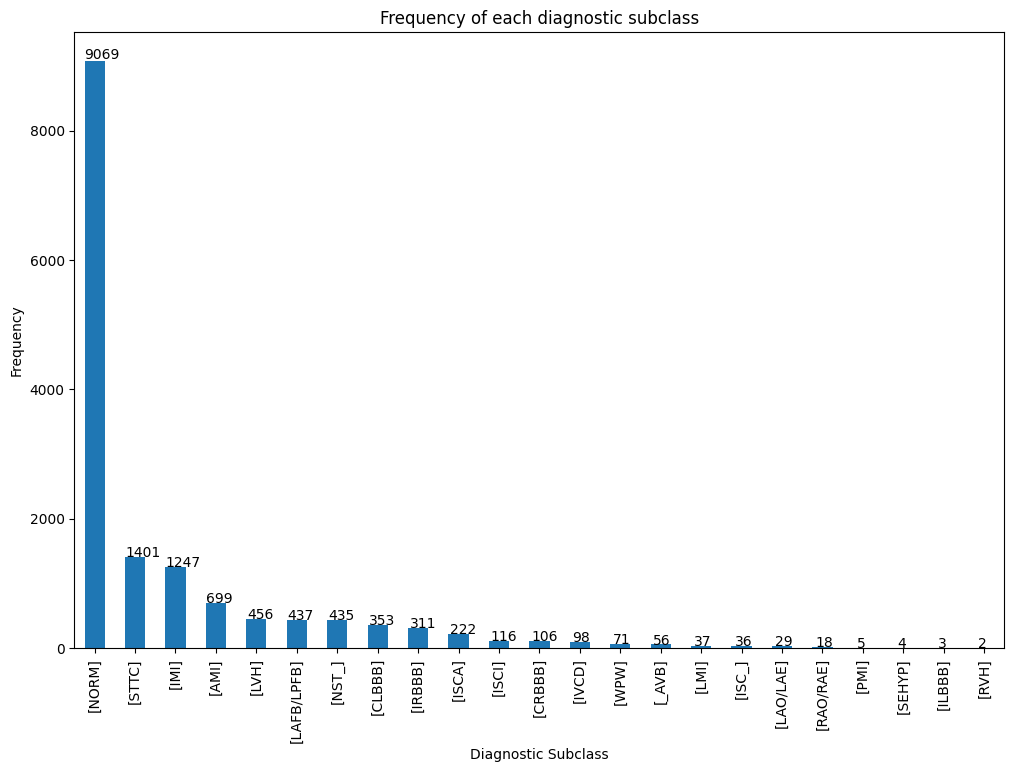

In [13]:
import matplotlib.pyplot as plt
# Count the number of occurrences of each element in 'diagnostic_superclass'
superclass_counts = Y['diagnostic_subclass'].value_counts()

# Plot the frequency of each diagnostic superclass
plt.figure(figsize=(12,8))
ax = superclass_counts.plot(kind='bar')
plt.title('Frequency of each diagnostic subclass')
plt.xlabel('Diagnostic Subclass')
plt.ylabel('Frequency')

# Add the counts above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()
